#  Cost functions 101

In this notebook we discuss the notion of a *cost function* which is intimately tied to the proper application of all major machine learning algorithms (including all of the ones we have seen in level 1 of the course).  This connection is the key to understanding how 


- the proper slope and intercept found when we used linear regression to fit a dataset


- the proper line was found when we performed two-class classification (and likewise for multi-class classification)


- nonlinearity was created when performing nonlienar regression and classification



Cost functions are the cornerstone of machine learning - and key to getting inside the black box.


------
This isn't a notebook you just read - you'll need to complete several coding portions of it (either individually or in groups) and think about the questions posed herein in order to build up your intuitive understanding of these algorithms, as well as your practical ability to use them via scikit-learn.  Whenever you see 'TODO' please do perform the requested task.

In other words, this is 'learning by discovery' notebook where you (either individually or in small groups) will start to build up your understanding of machine learning by doing real work and discussing it with your peers and instructors.  This is the best way to learn anything, far more effective than a book or lecture series.

# 1.  A hidden duality exposed

When we fit a line or nonlinear curve in level 1 of the course, we saw the predicted outcome: a single curve or surface fit to a dataset.  But lying just beneath the surface of each of those fitting processes was another kind of curve/surface that we could not see: a *cost function*.  This was iplicitly used by each algorithm to determine the best choice of parameters for a given dataset.  

Take - for example - linear regression.  In two dimensions.  Here we have only two parameters to tune: the slope and y-intercept of the line.  For any choice of these two parameters we can measure how well the line fits by calculating the total error - or the differences - between each point and a surrogate line.  This is illustrated in the image below taken from  [[1]](#bib_cell) - here the length of each dashed black line between a point and the example line (shown in magenta) is an individual error.  

<img src="images/lin_regression_errors.png" width=350 height=350/>

By summing these up we can get a reasonable sense of how well the line fits the data.  Why?  Intuitively - 

- If this total error is large then - on average - the line does not represent the points very well.  


- On the other hand - the smaller this error is then the better a line fits the data.  


and so by this logic we should seek the line that **minimizes** this total error.  But how in the world do we find this line - or equivalently its parameters?

This is where the *cost function* comes into play.  

## 1.1  Putting together the cost function point-by-point

The gif below animates the process of testing out a bunch of lines on a toy dataset (this simulation was inspired by [[2]](#bib_cell)) .  Shown first and last is the best fitting line in green - and in are about 50 random lines are drawn in magenta.  While each line is drawn in the left panel - in the right panel we plot a point in 3 dimensional space: the two parameters of the line (its slope and y-intercept) along with the corresponding total error - or *cost* - of this line on the dataset.  For the best fitting line this point is a big green dot - for the others they are drawn smaller and in magenta.
  
Notice as we proceed through the simulation that these points - each representing a slope/y-intercept/cost value - start to fill out a *surface* shown in light blue.  if we were to continue these experiments we would eventually fill out the entire smooth blue surface!  This is the *cost function* associated with linear regression on the dataset shown.  For any given choice of slope/intercept it gives us the cost value of the corresponding line on the data.  Again note: this cost function is *continuous* and *smooth*.

<img src="images/chelsea_regress_demo.gif" width=500 height=250/>

A similar story holds for classification schemes like logistic regression. For a two-dimensional example like the one shown below we can try a bunch of different random values for shape of the logistic fit - and we carve out a cost function like the one shown evolving in the right panel of gif below (again this simulation was inspired by [[2]](#bib_cell)).  We are not fitting a line to the data here - and the error is *not* the same as with linear regression (we will see this later) - but in principal we have a very similar phenomenon: a cost function whose minimum describes the set of parameters of the fitting function that make it best fit a dataset.

<img src="images/chelsea_logistic_demo.gif" width=500 height=250/>

Again note - this cost function (or surface) is *continuous* and *smooth*.   

This sort of thing holds much more generally as well - to encompass **all major supervised learning algorithms**.  

So - in sum - what we have seen at a high level is that 

- There is a continuous and smooth cost function associated to both regression and classification problems.


- Finding the set of parameters that **minimizes** this cost function provides us with the best fit / separation with regression / classification.

# 2.  To the notes!

See the pdf of handwritten notes called

>**metis_level_2_optmization_101_notes.pdf**

These are based on Chapter 2 of  [[1]](#bib_cell) - which you can [find online here](https://media.wix.com/ugd/f09e45_2c741285adf14e5aa9fd0696128a1275.pdf).

<a id='bib_cell'></a>

## Bibliography

[1] Watt, Jeremy et al. [Machine Learning Refined](www.mlrefined.com). Cambridge University Press, 2016

[2] Troy, Chelsea. [Machine Learning Intuition: Understanding Cost Functions](goo.gl/NT0DWg)

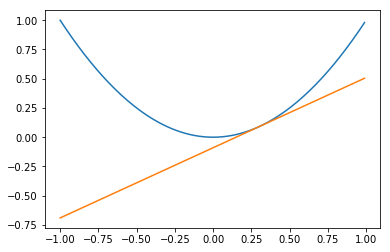

In [14]:
import numpy as np
import matplotlib.pyplot as plt
xvals = np.arange(-1, 1, 0.01) # Grid of 0.01 spacing from -2 to 10
yvals = xvals**2 # Evaluate function on xvals
plt.plot(xvals, yvals) # Create line plot with yvals against xvals
# plt.show()


newyvals = 0.6*xvals-0.09 # Evaluate quadratic approximation on xvals
plt.plot(xvals, newyvals) # Create line plot with red dashed line
# plt.title(’Example plots’)
# plt.xlabel(’Input’)
# plt.ylabel(’Function values’)
plt.show()

In [6]:
# Coding up an example of gradient descent
import random
val = random.uniform(-1, 1)
alpha = 0.1
for x in range(1,101):
    val = val - alpha * 2 * val
print val


1.84400967666e-10


In [7]:
# Coding up another example of gradient descent
import random
val_1 = random.uniform(-1, 1)
val_2 = random.uniform(-1, 1)
alpha = 0.9
for x in range(1,101):
    val_1 = val_1 - alpha * 2 * val_1
    val_2 = val_2 - alpha * 2 * val_2
print val_1**2 + val_2**2

3.45960551635e-20


In [49]:
# Coding up another example of gradient descent
import random
import math
val_1 = random.uniform(-10, 10)
val_2 = random.uniform(-10, 10)
alpha = 1
for x in range(1,101):
    val_1 = val_1 - alpha * (math.cos(val_1 + val_2) + 0.01 * 2 * val_1)
    val_2 = val_2 - alpha * (math.cos(val_1 + val_2) + 0.01 * 2 * val_2)
print math.sin(val_1 + val_2) + 0.01 * (val_1**2 + val_2**2)

-0.694532456595


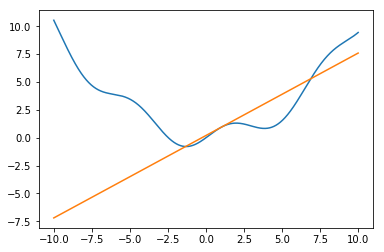

In [48]:
# Cost function plotting
import numpy as np
import matplotlib.pyplot as plt
xvals = np.arange(-10, 10,0.01) # Grid of 0.01 spacing from -2 to 10
yvals = np.sin(xvals)+0.1*xvals**2 # Evaluate function on xvals
plt.plot(xvals, yvals) # Create line plot with yvals against xvals
# plt.show()


newyvals = (np.cos(1)+0.2)*xvals + (np.sin(1)+0.1*1**2 - (np.cos(1)+0.2)*1) # Evaluate quadratic approximation on xvals
plt.plot(xvals, newyvals) # Create line plot with red dashed line
# plt.title(’Example plots’)
# plt.xlabel(’Input’)
# plt.ylabel(’Function values’)
plt.show()

In [86]:
# coding gradient descent
def compute_gradient(x,y,w):
    P = len(y)
    grad = 0
    for p in range(P):
        x_p = np.array([1,x[p]])
        x_p.shape = (len(x_p),1)
        y_p = y[p]
        temp = np.dot(x_p*x_p.T,w) - x_p*y_p
        grad+=2*temp
    return grad

In [26]:
### in this cell we import necessary libraries for the demo
import numpy as np                  # a fundamental numerical linear algebra library
import matplotlib.pyplot as plt     # a basic plotting library
import pandas as pd                 # a basic data handling library
import sys
sys.path.append('utils')

# this line is required in order to plot in a jupyter notebook itself
%matplotlib inline       

# load in the data and true function
data = np.asarray(pd.read_csv('~/Workspace/Metis_MachineLearningCourse/chi17_ml1/level_1/datasets/regr_linear_data.csv'))
input_data_1 = data[:,0]
output_data_1 = data[:,1]

ww = np.array([2,1])

theta1 = 0
theta2 = 0

print np.dot(input_data_1,np.transpose(input_data_1))
print input_data_1

12.5610036952
[  2.40833453e-01   1.72961589e-01   6.14645951e-02   5.49415494e-01
   2.26326317e-01   5.09529376e-01   2.35260756e-01   2.21632766e-01
   4.05674575e-01   3.81764537e-01   4.42392379e-01   7.34230472e-02
   9.34675782e-01   4.42070131e-02   6.49911719e-01   5.20486904e-01
   3.55306627e-01   6.49796778e-01   2.80811861e-01   6.81574435e-01
   5.06759518e-01   5.48589349e-01   5.68882836e-01   8.03228411e-01
   3.61872520e-01   5.54302045e-01   7.81662701e-01   8.74326947e-02
   6.08961337e-04   6.78297424e-01   6.84824292e-01   5.28741708e-01
   8.13066041e-01   1.96761092e-01   3.65378369e-01   2.91441849e-01
   6.56917815e-01   7.31607423e-01   9.74500770e-02   7.32027350e-02
   4.76350205e-01   6.67685532e-02   7.26999763e-02   9.02677068e-01
   4.55960736e-01   7.58224528e-01   6.82661718e-02   6.07531839e-01
   8.24634007e-01]


In [87]:
# def grad_desc(alpha,iterations,theta0,theta1,x,y):
alpha = 1
iterations = 100
theta0 = 0
theta1 = 0
theta = np.array([theta0,theta1])
theta.shape = [2,1]
theta
x = input_data_1
y = output_data_1
#     for i in range(iterations):
theta = theta - compute_gradient(x,y,theta)
theta

array([[ 41.94880764],
       [ 25.01033551]])

In [67]:
grad_desc(0.1,100,0,0,input_data_1,output_data_1)

array([[-9223372036854775808],
       [-9223372036854775808]])

In [27]:
range(len(output_data_1))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48]

In [28]:
len(output_data_1)

49

In [29]:
output_data_1

array([ 0.2495954 ,  0.09078019,  0.03528123,  0.47081486,  0.23325631,
        0.51974422,  0.27136881,  0.19441688,  0.34089445,  0.32969877,
        0.48377801,  0.11816847,  0.90777878, -0.08016942,  0.71718274,
        0.45957929,  0.35651099,  0.62186995,  0.28794196,  0.63969735,
        0.54899965,  0.53520996,  0.56499203,  0.85420825,  0.31156045,
        0.66016141,  0.78031191,  0.06328695,  0.07885285,  0.71348366,
        0.69509849,  0.53146482,  0.78576792,  0.21264857,  0.32877453,
        0.29282314,  0.68117455,  0.64108884,  0.10603338,  0.03620366,
        0.44019034,  0.05270691,  0.0830166 ,  0.94211594,  0.41693022,
        0.82257892,  0.14828632,  0.54167307,  0.85657123])